In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import quandl as ql
import datetime as dt

In [2]:
# 5.3. Investment Costs

# U.S. Large Cap Stock Market
# Hedge Funds Index: Eureka Equal Weighted Hedge Fund Index

# Data Query and Range Delimiting
costsquery1 = web.DataReader('SPY', 'yahoo', '2006-04-01', '2016-05-01')
ccosts = costsquery1['Close']
mcostsall = ccosts.asfreq('M', method='pad')
mcostsall = pd.DataFrame(mcostsall)
mcostsall.columns = ['mlarge']

costsquery2 = ql.get("EUREKA/473", collapse="monthly")
costsquery2 = costsquery2['2006-04-01':'2016-04-30']
costsquery2 = pd.DataFrame(costsquery2)
costsquery2.columns = ['mhedge']
mcostsall.loc[:, 'mhedge'] = costsquery2['mhedge']


In [3]:
# Monthly and Annual Returns Calculation
mcostsall.loc[:, 'mlargeret'] = mcostsall.loc[:, 'mlarge'] / mcostsall.loc[:, 'mlarge'].shift(1) - 1
mcostsall.loc[:, 'mhedgeret'] = mcostsall.loc[:, 'mhedge'] / 100


In [4]:
# Cumulative Monthly Returns Calculation
mcostsall.loc[:, 'mlargecum'] = np.cumprod(mcostsall.loc[:, 'mlargeret'] + 1) - 1
mcostsall.loc[:, 'mhedgecum'] = np.cumprod(mcostsall.loc[:, 'mhedgeret'] + 1) - 1


In [5]:
# Annualized Monthly Returns Calculation
mcostsall.loc[:, 'mlargecuma'] = np.cumprod(mcostsall.loc[:, 'mlargeret'] + 1) ** (12 / len(mcostsall)) - 1
mcostsall.loc[:, 'mhedgecuma'] = np.cumprod(mcostsall.loc[:, 'mhedgeret'] + 1) ** (12 / len(mcostsall)) - 1


In [6]:
# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 3, 31)
mlargereta = mcostsall.at[lastdate, 'mlargecuma']
mhedgereta = mcostsall.at[lastdate, 'mhedgecuma']


In [7]:
# Annualized Monthly Standard Deviation Calculation
mlargestdeva = np.std(mcostsall.loc[:, 'mlargeret']) * np.sqrt(12)
mhedgestdeva = np.std(mcostsall.loc[:, 'mhedgeret']) * np.sqrt(12)


In [8]:
# 5.3.1. Compounded Annual Growth Rate Comparison

# Vanguard VFIAX Mutual Fund 0.05% Annual Expense Ratio
msp500reta = mlargereta + 0.0005
# Morningstar Category Average 1.10% Annual Expense Ratio
mlargemeanreta = msp500reta - 0.0110


In [9]:
# 5.3.2. Cumulative Returns Comparison
msp500cum = ((1 + msp500reta) ** 10) - 1
mlargecum = ((1 + mlargereta) ** 10) - 1
mlargemeancum = ((1 + mlargemeanreta) ** 10) - 1


In [10]:
# 5.3.3. Investment Costs Tables

# Annualized Monthly Return Comparison Table (including Annual Expense Ratio)
mcostsdata1 = [{'0': '', '1': 'msp500reta', '2': 'mlargereta', '3': 'mlargemeanreta'},
        {'0': 'Annualized Return', '1': msp500reta, '2': mlargereta, '3': mlargemeanreta}]
mcoststable1 = pd.DataFrame(mcostsdata1)
print("")
print(mcoststable1)
print("")



                   0           1           2               3
0                     msp500reta  mlargereta  mlargemeanreta
1  Annualized Return   0.0461895   0.0456895       0.0351895



In [11]:
# Cumulative Annualized Monthly Return Comparison Table (including Annual Expense Ratio)
mcostsdata2 = [{'0': '', '1': 'msp500cum', '2': 'mlargecum', '3': 'mlargemeancum'},
        {'0': 'Cumulative Annualized Return', '1': msp500cum, '2': mlargecum, '3': mlargemeancum}]
mcoststable2 = pd.DataFrame(mcostsdata2)
print("")
print(mcoststable2)
print("")



                              0          1          2              3
0                                msp500cum  mlargecum  mlargemeancum
1  Cumulative Annualized Return   0.570737   0.563246       0.413183



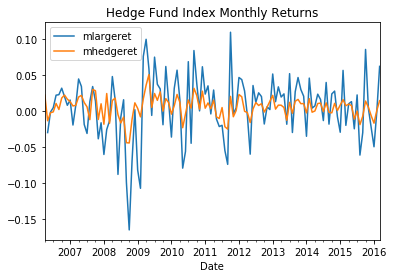

In [12]:
# 5.3.4. Hedge Funds Comparison Charts and Tables

# Monthly Returns Chart
mcostsall.plot(y=['mlargeret', 'mhedgeret'])
plt.title('Hedge Fund Index Monthly Returns')
plt.legend(loc='upper left')
plt.show()


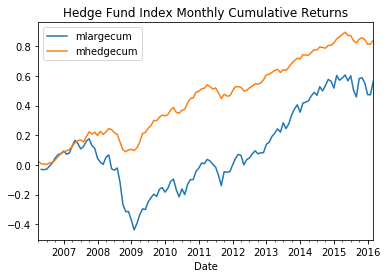

In [13]:
# Cumulative Monthly Returns Chart
mcostsall.plot(y=['mlargecum', 'mhedgecum'])
plt.title('Hedge Fund Index Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [14]:
# Annualized Monthly Returns and Standard Deviation
hedgedata = [{'0': '', '1': 'mlargeret', '2': 'mhedgeret'},
        {'0': 'Annualized Return', '1': mlargereta, '2': mhedgereta},
        {'0': 'Annualized Standard Deviation', '1': mlargestdeva, '2': mhedgestdeva}]
hedgetable = pd.DataFrame(hedgedata)
print("")
print(hedgetable)
print("")


                               0          1          2
0                                 mlargeret  mhedgeret
1              Annualized Return  0.0456895  0.0628257
2  Annualized Standard Deviation   0.152374  0.0510838

